In [ ]:
from google.colab import files
import zipfile

# Upload local ZIP
uploaded = files.upload()

# Extract ZIP
for fn in uploaded.keys():
    with zipfile.ZipFile(fn, 'r') as zip_ref:
        zip_ref.extractall('dataset')


In [ ]:
# Install required packages (most are pre-installed in Colab)
!pip install opencv-python tqdm


In [5]:
from google.colab import files
import zipfile

# Upload local ZIP
uploaded = files.upload()

# Extract ZIP
for fn in uploaded.keys():
    with zipfile.ZipFile(fn, 'r') as zip_ref:
        zip_ref.extractall('dataset')


KeyboardInterrupt: 

In [ ]:
from google.colab import files
import zipfile

# Upload local ZIP
uploaded = files.upload()

# Extract ZIP
for fn in uploaded.keys():
    with zipfile.ZipFile(fn, 'r') as zip_ref:
        zip_ref.extractall('dataset')


KeyboardInterrupt: 

In [9]:
import os
from google.colab import files

# Upload local files
uploaded = files.upload()

# Save uploaded files to 'dataset' directory
dataset_dir = 'dataset'
os.makedirs(dataset_dir, exist_ok=True)

for filename, content in uploaded.items():
    with open(os.path.join(dataset_dir, filename), 'wb') as f:
        f.write(content)

print(f"Saved {len(uploaded)} files to '{dataset_dir}' directory.")

Saving 16896_idx5_x951_y751_class0.png to 16896_idx5_x951_y751_class0 (1).png
Saving 16896_idx5_x951_y801_class0.png to 16896_idx5_x951_y801_class0 (1).png
Saving 16896_idx5_x951_y851_class0.png to 16896_idx5_x951_y851_class0 (1).png
Saving 16896_idx5_x951_y901_class0.png to 16896_idx5_x951_y901_class0 (1).png
Saving 16896_idx5_x951_y951_class0.png to 16896_idx5_x951_y951_class0 (1).png
Saving 16896_idx5_x951_y151_class0.png to 16896_idx5_x951_y151_class0 (1).png
Saving 16896_idx5_x951_y201_class0.png to 16896_idx5_x951_y201_class0 (1).png
Saving 16896_idx5_x951_y251_class0.png to 16896_idx5_x951_y251_class0 (1).png
Saving 16896_idx5_x951_y301_class0.png to 16896_idx5_x951_y301_class0 (1).png
Saving 16896_idx5_x951_y351_class0.png to 16896_idx5_x951_y351_class0 (1).png
Saving 16896_idx5_x951_y401_class0.png to 16896_idx5_x951_y401_class0 (1).png
Saving 16896_idx5_x951_y451_class0.png to 16896_idx5_x951_y451_class0 (1).png
Saving 16896_idx5_x951_y501_class0.png to 16896_idx5_x951_y501_c

In [10]:
import os, cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import seaborn as sns


In [12]:
IMG_SIZE = (50, 50)

def load_images(path):
    data, labels = [], []
    for fname in os.listdir(path):
        # Extract label from filename (assuming format like '...classX.png')
        if 'class0' in fname:
            label = 0
        elif 'class1' in fname:
            label = 1
        else:
            continue # Skip files that don't match the expected naming convention

        img = cv2.imread(os.path.join(path, fname))
        if img is None:
            continue
        img = cv2.resize(img, IMG_SIZE)
        data.append(img)
        labels.append(label)
    return np.array(data), np.array(labels)

X, y = load_images('dataset')
X = X.astype('float32') / 255.0
y = y.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train:", X_train.shape, "Test:", X_test.shape)

Train: (96, 50, 50, 3) Test: (24, 50, 50, 3)


In [13]:
def build_cancernet(input_shape=(50,50,3)):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        MaxPooling2D(),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(),
        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

model = build_cancernet()
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,649 (1.36 MB)

 Trainable params: 355,649 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10, batch_size=32
)



Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 283ms/step - accuracy: 0.8815 - loss: 0.4766 - val_accuracy: 1.0000 - val_loss: 0.0176
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 1.0000 - loss: 0.0126 - val_accuracy: 1.0000 - val_loss: 1.1303e-06
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 1.0000 - loss: 2.0046e-05 - val_accuracy: 1.0000 - val_loss: 4.4632e-12
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 1.0000 - loss: 1.4714e-09 - val_accuracy: 1.0000 - val_loss: 1.0425e-17
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - accuracy: 1.0000 - loss: 8.7627e-15 - val_accuracy: 1.0000 - val_loss: 5.3262e-23
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 1.0000 - loss: 1.4437e-15 - val_accuracy: 1.0000 - val_loss: 1.1200e-27
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 1.0000 - loss: 5.2072e-19 - val_accuracy: 1.0000 - val_loss: 1.2004e-31
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 1.0000 - los

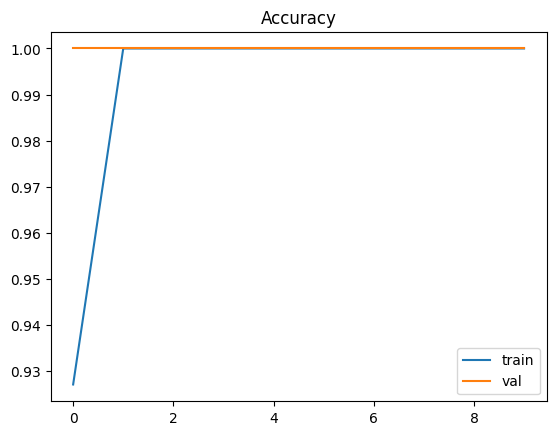

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


ValueError: Number of classes, 1, does not match size of target_names, 2. Try specifying the labels parameter

In [15]:
# Accuracy plot
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend(); plt.title('Accuracy')
plt.show()

# Predictions
preds = (model.predict(X_test) > 0.5).astype('int32')
print(classification_report(y_test, preds, target_names=['Benign','Malignant']))

# Confusion matrix
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign','Malignant'], yticklabels=['Benign','Malignant'])
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.show()


In [16]:
import numpy as np

train_class_counts = np.unique(np.squeeze(y_train), return_counts=True)
test_class_counts = np.unique(np.squeeze(y_test), return_counts=True)

print("Training set class distribution:", dict(zip(train_class_counts[0], train_class_counts[1])))
print("Testing set class distribution:", dict(zip(test_class_counts[0], test_class_counts[1])))

Training set class distribution: {np.int64(0): np.int64(96)}
Testing set class distribution: {np.int64(0): np.int64(24)}


In [17]:
from google.colab import files
import os

# Upload local files for the second class
print("Please upload the files for the second class:")
uploaded_class1 = files.upload()

# Save uploaded files to 'dataset' directory
dataset_dir = 'dataset'
os.makedirs(dataset_dir, exist_ok=True)

for filename, content in uploaded_class1.items():
    with open(os.path.join(dataset_dir, filename), 'wb') as f:
        f.write(content)

print(f"Saved {len(uploaded_class1)} files to '{dataset_dir}' directory.")

Please upload the files for the second class:


Saving 16896_idx5_x901_y1401_class1.png to 16896_idx5_x901_y1401_class1.png
Saving 16896_idx5_x901_y1451_class1.png to 16896_idx5_x901_y1451_class1.png
Saving 16896_idx5_x901_y1501_class1.png to 16896_idx5_x901_y1501_class1.png
Saving 16896_idx5_x901_y1551_class1.png to 16896_idx5_x901_y1551_class1.png
Saving 16896_idx5_x901_y1601_class1.png to 16896_idx5_x901_y1601_class1.png
Saving 16896_idx5_x951_y1251_class1.png to 16896_idx5_x951_y1251_class1.png
Saving 16896_idx5_x951_y1301_class1.png to 16896_idx5_x951_y1301_class1.png
Saving 16896_idx5_x951_y1351_class1.png to 16896_idx5_x951_y1351_class1.png
Saving 16896_idx5_x951_y1401_class1.png to 16896_idx5_x951_y1401_class1.png
Saving 16896_idx5_x951_y1451_class1.png to 16896_idx5_x951_y1451_class1.png
Saving 16896_idx5_x951_y1501_class1.png to 16896_idx5_x951_y1501_class1.png
Saving 16896_idx5_x951_y1551_class1.png to 16896_idx5_x951_y1551_class1.png
Saving 16896_idx5_x951_y1601_class1.png to 16896_idx5_x951_y1601_class1.png
Saving 16896

In [18]:
X, y = load_images('dataset')
X = X.astype('float32') / 255.0
y = y.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train:", X_train.shape, "Test:", X_test.shape)

Train: (184, 50, 50, 3) Test: (46, 50, 50, 3)


In [19]:
def build_cancernet(input_shape=(50,50,3)):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        MaxPooling2D(),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(),
        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

model = build_cancernet()
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 48, 48, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 22, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 9, 9, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,649 (1.36 MB)

 Trainable params: 355,649 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10, batch_size=32
)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 169ms/step - accuracy: 0.4978 - loss: 0.7168 - val_accuracy: 0.4783 - val_loss: 0.6888
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - accuracy: 0.6057 - loss: 0.6804 - val_accuracy: 0.4783 - val_loss: 0.6566
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - accuracy: 0.6956 - loss: 0.6402 - val_accuracy: 0.8043 - val_loss: 0.5536
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step - accuracy: 0.7436 - loss: 0.5717 - val_accuracy: 0.8478 - val_loss: 0.4300
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - accuracy: 0.8163 - loss: 0.4360 - val_accuracy: 0.9783 - val_loss: 0.2327
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.9061 - loss: 0.2846 - val_accuracy: 0.9348 - val_loss: 0.1063
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.9012 - loss: 0.2297 - val_accuracy: 1.0000 - val_loss: 0.0430
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.8793 - loss: 0.2536 - val_accuracy: 1.0000 - val_loss:

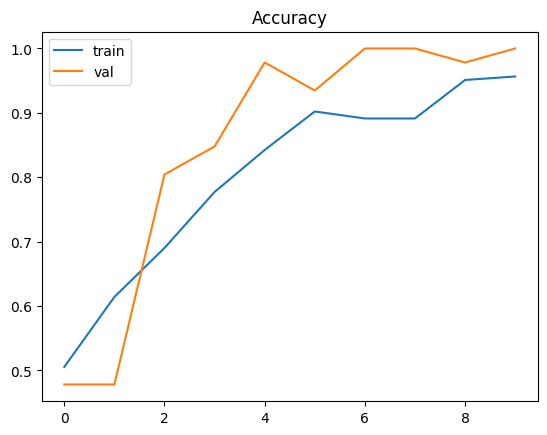

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00        22
   Malignant       1.00      1.00      1.00        24

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46



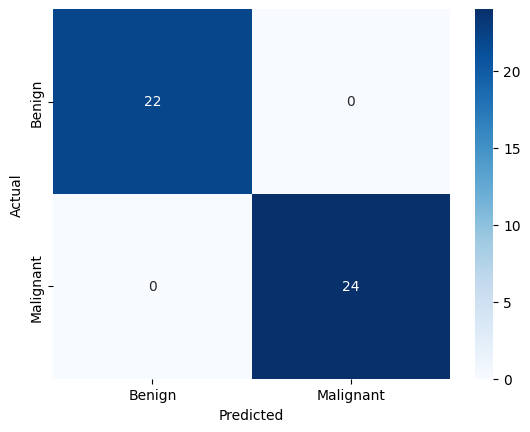

In [21]:
# Accuracy plot
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend(); plt.title('Accuracy')
plt.show()

# Predictions
preds = (model.predict(X_test) > 0.5).astype('int32')
print(classification_report(y_test, preds, target_names=['Benign','Malignant']))

# Confusion matrix
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign','Malignant'], yticklabels=['Benign','Malignant'])
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.show()